In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from  torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(f" device :{device}")

 device :cuda


In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/animal-faces")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinay7410
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces


100%|██████████| 696M/696M [00:01<00:00, 378MB/s]


In [5]:
!ls

animal-faces  sample_data


In [6]:

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
cat_files=os.listdir("/content/animal-faces/afhq/train/cat")
print(cat_files[:])
print(cat_files[-5:])
print(len(cat_files))

['pixabay_cat_000684.jpg', 'pixabay_cat_002333.jpg', 'pixabay_cat_000444.jpg', 'pixabay_cat_003375.jpg', 'flickr_cat_000103.jpg', 'pixabay_cat_004236.jpg', 'pixabay_cat_003463.jpg', 'pixabay_cat_002154.jpg', 'pixabay_cat_002903.jpg', 'pixabay_cat_002035.jpg', 'pixabay_cat_001858.jpg', 'pixabay_cat_002094.jpg', 'pixabay_cat_001502.jpg', 'flickr_cat_000590.jpg', 'pixabay_cat_004131.jpg', 'pixabay_cat_004275.jpg', 'pixabay_cat_001092.jpg', 'flickr_cat_000792.jpg', 'pixabay_cat_004536.jpg', 'flickr_cat_000217.jpg', 'pixabay_cat_003539.jpg', 'pixabay_cat_003550.jpg', 'pixabay_cat_000200.jpg', 'flickr_cat_000411.jpg', 'pixabay_cat_001329.jpg', 'pixabay_cat_003839.jpg', 'pixabay_cat_003064.jpg', 'flickr_cat_000402.jpg', 'pixabay_cat_000035.jpg', 'pixabay_cat_002893.jpg', 'pixabay_cat_002794.jpg', 'pixabay_cat_003806.jpg', 'pixabay_cat_002355.jpg', 'flickr_cat_000240.jpg', 'pixabay_cat_002057.jpg', 'pixabay_cat_000119.jpg', 'pixabay_cat_001393.jpg', 'pixabay_cat_002007.jpg', 'pixabay_cat_00006

In [8]:
dog_files=os.listdir("/content/animal-faces/afhq/train/dog")
print(dog_files[:])
print(dog_files[-5:])
print(len(dog_files))

['pixabay_dog_000019.jpg', 'pixabay_dog_000711.jpg', 'pixabay_dog_001678.jpg', 'pixabay_dog_001791.jpg', 'pixabay_dog_003390.jpg', 'flickr_dog_000398.jpg', 'pixabay_dog_003029.jpg', 'pixabay_dog_003290.jpg', 'pixabay_dog_002981.jpg', 'pixabay_dog_003615.jpg', 'pixabay_dog_002554.jpg', 'pixabay_dog_003213.jpg', 'pixabay_dog_000031.jpg', 'pixabay_dog_001107.jpg', 'pixabay_dog_000451.jpg', 'pixabay_dog_001240.jpg', 'pixabay_dog_002941.jpg', 'pixabay_dog_001230.jpg', 'pixabay_dog_001722.jpg', 'pixabay_dog_002800.jpg', 'flickr_dog_000645.jpg', 'flickr_dog_000662.jpg', 'flickr_dog_000124.jpg', 'pixabay_dog_003675.jpg', 'pixabay_dog_004055.jpg', 'flickr_dog_001083.jpg', 'pixabay_dog_001256.jpg', 'pixabay_dog_000133.jpg', 'pixabay_dog_002816.jpg', 'flickr_dog_000634.jpg', 'pixabay_dog_000433.jpg', 'pixabay_dog_001828.jpg', 'pixabay_dog_000750.jpg', 'pixabay_dog_002763.jpg', 'pixabay_dog_003917.jpg', 'pixabay_dog_000924.jpg', 'pixabay_dog_001686.jpg', 'flickr_dog_000261.jpg', 'pixabay_dog_00096

In [9]:
wild_files=os.listdir("/content/animal-faces/afhq/train/wild")
print(wild_files[:])
print(wild_files[-5:])
print(len(wild_files))

['flickr_wild_002384.jpg', 'pixabay_wild_000960.jpg', 'flickr_wild_000587.jpg', 'pixabay_wild_001031.jpg', 'flickr_wild_002897.jpg', 'flickr_wild_002715.jpg', 'pixabay_wild_000299.jpg', 'flickr_wild_003163.jpg', 'pixabay_wild_000421.jpg', 'flickr_wild_000604.jpg', 'flickr_wild_003071.jpg', 'flickr_wild_000431.jpg', 'flickr_wild_001828.jpg', 'flickr_wild_001822.jpg', 'pixabay_wild_000970.jpg', 'pixabay_wild_000677.jpg', 'flickr_wild_000980.jpg', 'pixabay_wild_000192.jpg', 'flickr_wild_002902.jpg', 'flickr_wild_003486.jpg', 'pixabay_wild_000818.jpg', 'flickr_wild_001061.jpg', 'flickr_wild_001910.jpg', 'flickr_wild_001747.jpg', 'flickr_wild_003493.jpg', 'flickr_wild_003154.jpg', 'flickr_wild_003500.jpg', 'flickr_wild_003334.jpg', 'flickr_wild_002113.jpg', 'flickr_wild_003525.jpg', 'flickr_wild_000370.jpg', 'flickr_wild_002208.jpg', 'flickr_wild_002635.jpg', 'flickr_wild_001907.jpg', 'flickr_wild_002873.jpg', 'pixabay_wild_000137.jpg', 'flickr_wild_002523.jpg', 'pixabay_wild_000139.jpg', '

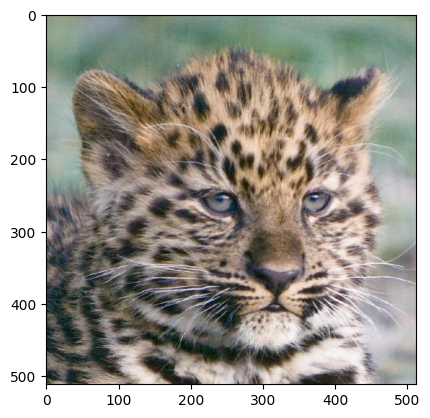

In [10]:

# displaying the images with mask
img=mpimg.imread("/content/animal-faces/afhq/train/wild/flickr_wild_002384.jpg")
imgplot=plt.imshow(img)
plt.show()

In [11]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),   # VGG16 expects 224x224 images
    transforms.ToTensor(),           # convert image to tensor [0,1]
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet mean
        std=[0.229, 0.224, 0.225]    # ImageNet std
    )
])


In [12]:
from torch.utils.data import Dataset
from PIL import Image
import os
import torch

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Path to dataset root folder, e.g. "dataset/train"
            transform (callable, optional): Optional transform to apply on an image
        """
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))   # folder names are class names
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}

        # store all image paths and labels
        self.samples = []
        for cls_name in self.classes:
            cls_folder = os.path.join(root_dir, cls_name)
            for fname in os.listdir(cls_folder):
                path = os.path.join(cls_folder, fname)
                self.samples.append((path, self.class_to_idx[cls_name]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]

        # open image
        image = Image.open(img_path).convert("RGB")   # ensure 3 channels

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)


In [13]:
train_dataset = CustomImageDataset("/content/animal-faces/afhq/train", transform=transform)
test_dataset  = CustomImageDataset("/content/animal-faces/afhq/val", transform=transform)

from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(train_dataset.classes)       # ['cats', 'dogs', 'wild']
print(train_dataset.class_to_idx)

['cat', 'dog', 'wild']
{'cat': 0, 'dog': 1, 'wild': 2}


In [14]:
import torchvision.models as models
vgg16=models.vgg16(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:02<00:00, 187MB/s]


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using device :{device}")

using device :cuda


In [16]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
for params in vgg16.features.parameters():
  params.requires_grad=False

In [18]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [19]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)

In [20]:
vgg16 = vgg16.to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr=1e-4)


In [22]:
epochs=10

In [23]:
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = vgg16(batch_features)
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.04527022058983709
Epoch: 2 , Loss: 0.008791476806044758
Epoch: 3 , Loss: 0.007842019731719399
Epoch: 4 , Loss: 0.010270671093615858
Epoch: 5 , Loss: 0.010317265184033919
Epoch: 6 , Loss: 0.002481783879933538
Epoch: 7 , Loss: 0.004638749822419488
Epoch: 8 , Loss: 0.0064174586816124765
Epoch: 9 , Loss: 0.0072809372233880315
Epoch: 10 , Loss: 0.005049728256461737


In [24]:
vgg16.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Test Accuracy: {100. * correct / total:.2f}%")


Test Accuracy: 99.80%


In [26]:
vgg16.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in train_loader:   # use training data here
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Train Accuracy: {100. * correct / total:.2f}%")


Train Accuracy: 99.99%


In [29]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# define the same transforms as training (resize -> tensor -> normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 expects 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# define your class names (must match your dataset labels)
class_names = train_dataset.classes   # if using ImageFolder
# or manually: class_names = ["cat", "dog", "wild"]

def predict_image(image_path, model, device):
    model.eval()
    image = Image.open(image_path).convert("RGB")  # open as RGB
    img_t = transform(image).unsqueeze(0).to(device)  # add batch dimension

    with torch.no_grad():
        outputs = model(img_t)
        _, predicted = outputs.max(1)

    class_name = class_names[predicted.item()]
    return class_name


# Example usage:
image_path = "/content/tiger.jpeg"  # path to your test image
predicted_class = predict_image(image_path, vgg16, device)
print(f"Predicted Class: {predicted_class}")


Predicted Class: wild
